<a href="https://colab.research.google.com/github/PDmitrii/sql_tasks_sber_d_a/blob/main/SberDA_hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import psycopg2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
DB_HOST='52.157.159.24'
DB_USER='student14'
DB_USER_PASSWORD='student14_password'
DB_NAME='sql_ex_for_student14'

conn=psycopg2.connect(host=DB_HOST,user=DB_USER,password=DB_USER_PASSWORD,dbname=DB_NAME)

cur=conn.cursor()

In [3]:
request_13ls="""
select 
model,
maker,
type
from product
"""

df_13ls=pd.read_sql_query(request_13ls,conn)

In [4]:
df_13ls

,model,maker,type
0,1121,B,PC
1,1232,A,PC
2,1233,A,PC
3,1260,E,PC
4,1276,A,Printer
5,1288,D,Printer
6,1298,A,Laptop
7,1321,C,Laptop
8,1401,A,Printer
9,1408,A,Printer


In [5]:
request_14l3="""
              select 
              *,
              case when price>(select avg(price) from printer) then 1 else 0 end as flag 
              from printer
          """

df_14l3=pd.read_sql_query(request_14l3,conn)

In [6]:
df_14l3

,code,model,color,type,price,flag
0,1,1276,n,Laser,400.0,1
1,2,1433,y,Jet,270.0,0
2,3,1434,y,Jet,290.0,0
3,4,1401,n,Matrix,150.0,0
4,5,1408,n,Matrix,270.0,0
5,6,1288,n,Laser,400.0,1


In [7]:
request_15l3="""
              select 
              * 
              from ships
              where class is null
          """

df_15l3=pd.read_sql_query(request_15l3,conn)

In [8]:
df_15l3

,name,class,launched


In [9]:
request_16l3="""
              select 
              * 
              from battles
              where extract(year from date) not in (select launched from ships)
          """

df_16l3=pd.read_sql_query(request_16l3,conn)

In [10]:
df_16l3

,name,date
0,#Cuba62a,1962-10-20
1,#Cuba62b,1962-10-25


In [11]:
request_17l3="""
                select 
                o.battle,
                s.class 
                from outcomes o
                left join ships s
                on o.ship=s.name
                where s.class='Kongo'
          """

df_17l3=pd.read_sql_query(request_17l3,conn)

In [12]:
df_17l3

,battle,class
0,Guadalcanal,Kongo


In [15]:
request_1l4=""" --replace view all_products_flag_300 as
                select 
                ap.model,
                ap.flag 
                from 	(
                        select model,case when price>300 then 1 else 0 end as flag from pc
                        union 
                        select model,case when price>300 then 1 else 0 end as flag from laptop
                        union
                        select model,case when price>300 then 1 else 0 end as flag from printer
                        ) ap;
                --select * from all_products_flag_300 order by model
             """

df_1l4=pd.read_sql_query(request_1l4,conn)

In [16]:
df_1l4

,model,flag
0,1233,1
1,1260,1
2,1121,1
3,1401,0
4,1298,1
5,1321,1
6,1288,1
7,1434,0
8,1433,0
9,1276,1


In [17]:
request_2l4="""
                --create or replace view all_products_flag_avg_price as 
                with ap as 	(
                      select model,price from pc
                      union 
                      select model,price from laptop
                      union 
                      select model,price from printer
                      )

                select 
                model,
                price,
                case when price>(select avg(price) from ap) then 1 else 0 end as flag
                from ap;
                --select * from all_products_flag_avg_price order by model,price
             """

df_2l4=pd.read_sql_query(request_2l4,conn)

In [18]:
df_2l4

,model,price,flag
0,1232,350.0,0
1,1232,600.0,0
2,1408,270.0,0
3,1121,850.0,1
4,1298,700.0,1
5,1750,1200.0,1
6,1233,950.0,1
7,1433,270.0,0
8,1434,290.0,0
9,1298,1050.0,1


In [19]:
request_3l4="""
              with pr_$ as 
                          (select 
                          p.model,
                          p.price,
                          prd.maker
                          from printer p
                          left join product prd
                          on p.model=prd.model and prd.type='Printer')
                    select 
                    model
                    from pr_$ 
                    where maker='A' and price>	all	  (
                                                      select avg_price
                                                      from 	(
                                                            select 
                                                            maker,
                                                            avg(price) as avg_price
                                                            from pr_$
                                                            group by 1
                                                            having maker in ('C','D')
                                                            ) a
                                                      )
             """

df_3l4=pd.read_sql_query(request_3l4,conn)

In [20]:
df_3l4

,model
0,1276


In [21]:
request_4l4="""
                with base as
                      (
                      select 
                      t2.maker,
                      t1.model,
                      t1.price,
                      t2.type
                      from
                        (select model,price,'PC' as type from pc
                        union 
                        select model,price,'Printer' from printer
                        union 
                        select model,price,'Laptop' from laptop) t1
                        left join product t2
                        on t1.model=t2.model and t1.type=t2.type
                        )
                select 
                distinct
                model 
                from base 
                where maker='A' and price> All (select 
                                a.avg_price 
                                from
                                  (select
                                  maker,
                                  avg(price) as avg_price 
                                  from base 
                                  where type='Printer' and maker in ('D','С')
                                  group by 1) a
                                )
          """

df_4l4=pd.read_sql_query(request_4l4,conn)

In [22]:
df_4l4

,model
0,1232
1,1233
2,1276
3,1298
4,1752


In [23]:
request_5l4="""
                select 
                avg(base.price)
                from 	(
                    select model,price from pc
                    union all 
                    select model,price from laptop
                    union all
                    select model,price from printer
                    ) base
                left join product
                on base.model=product.model
                where product.maker='A'
          """

df_5l4=pd.read_sql_query(request_5l4,conn)

In [24]:
df_5l4

,avg
0,658.0


In [27]:
request_6l4="""
                --create or replace view count_products_by_makers as
                select
                p.maker,
                count(*)
                from
                (select model from pc
                union all 
                select model from laptop
                union all 
                select model from printer) a
                left join product p 
                on p.model=a.model
                group by 1;
                --select * from count_products_by_makers
          """

df_6l4=pd.read_sql_query(request_6l4,conn)

In [28]:
df_6l4

,maker,count
0,B,4
1,C,1
2,D,2
3,E,2
4,A,15


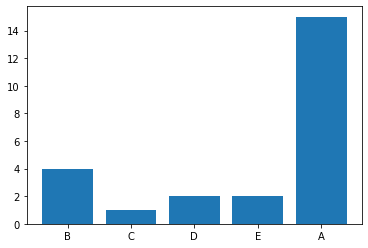

In [29]:
plt.bar(df_6l4['maker'],df_6l4['count']);

In [39]:
request_8l4="""
              --drop view printer_updated_with_makers;
              --drop table printer_updated;
              --create table printer_updated as table printer;
              --delete from printer_updated 
              --where model in (select model from product where maker='D' and type='Printer');
              select * from printer_updated --to show what table consists of
          """

df_8l4=pd.read_sql_query(request_8l4,conn)

DatabaseError: ignored

In [ ]:
df_8l4

In [ ]:
request_9l4="""
                create or replace view printer_updated_with_makers as
                select
                a.*,
                b.maker
                from printer_updated a
                left join product b 
                on a.model=b.model;

                select * from printer_updated_with_makers
          """

df_9l4=pd.read_sql_query(request_9l4,conn)

In [ ]:
df_9l4

In [ ]:
request_10l4= """
                  create or replace view sunk_ships_by_classes as
                  select 
                  case when s.class is null then '0' else s.class end as class,
                  count(*)
                  from outcomes o 
                  left join ships s 
                  on o.ship=s.name
                  where result='sunk'
                  group by 1;

                  select * from sunk_ships_by_classes
              """

df_10l4=pd.read_sql_query(request_10l4,conn)

In [ ]:
df_10l4

In [ ]:
plt.bar(df_10l4['class'],df_10l4['count']);

In [ ]:
request_12l4= """
                create table classes_with_flag as
                select
                *,
                case when numguns>=9 then 1 else 0 end as flag 
                from classes;
                select * from classes_with_flag
              """

df_12l4=pd.read_sql_query(request_12l4,conn)

In [ ]:
df_12l4

In [ ]:
request_13l4= """
                  select 
                  country,
                  count(class)
                  from classes
                  group by 1
              """

df_13l4=pd.read_sql_query(request_13l4,conn)

In [ ]:
plt.bar(df_13l4['country','count'])

In [ ]:
request_14l4= """
                  select count(*) from ships where name like 'O%' or name like 'M%'
              """

df_14l4=pd.read_sql_query(request_14l4,conn)

In [ ]:
df_14l4


In [ ]:
request_15l4= """
                  select count(*) from ships where name like '% %'
              """

df_15l4=pd.read_sql_query(request_15l4,conn)

In [ ]:
df_15l4

In [ ]:
request_16l4= """
                  select 
                  launched,
                  count(name)
                  from ships
                  group by 1
                  order by 1
              """

df_16l4=pd.read_sql_query(request_16l4,conn)

In [ ]:
df_16l4

In [ ]:
plt.bar(df_16l4['launched','count'])